# 3D Visualizer

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import glob
import os

# load folder of class of trajectories
folder_path = os.path.join(os.getcwd(), '../dataset#1')
print(folder_path)
target_folders = ["circle", "diagonal_left", "diagonal_right", "horizontal", "vertical"]

C:\Users\Theo\Desktop\GitHub\EuroFusion-AI\DataAugmentation\../dataset#1



Displaying trajectories for folder: circle


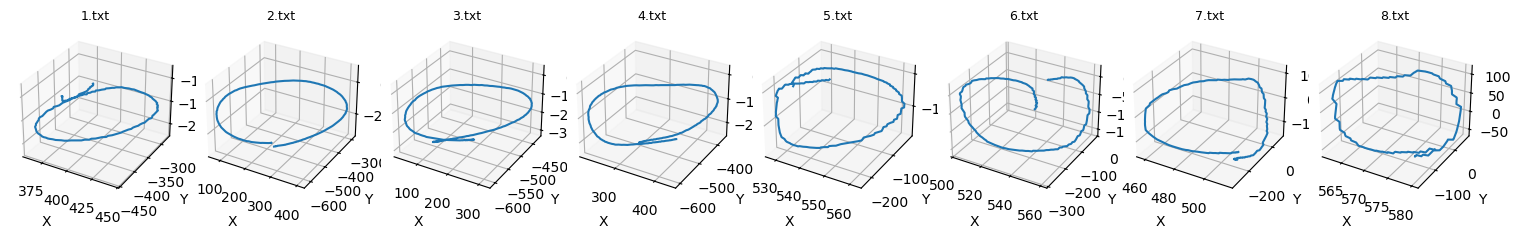


Displaying trajectories for folder: diagonal_left


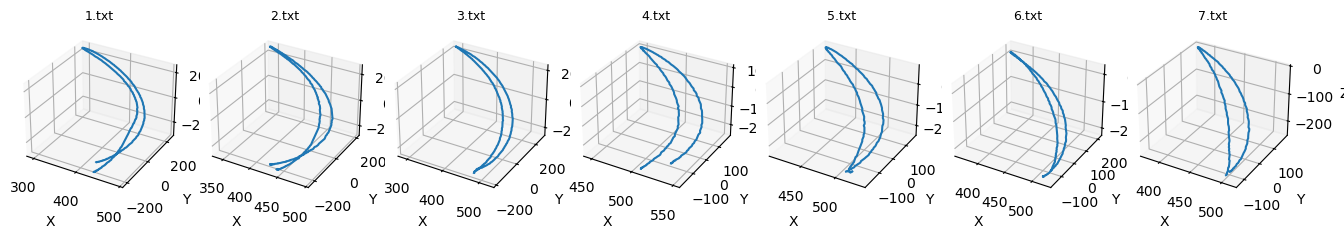


Displaying trajectories for folder: diagonal_right


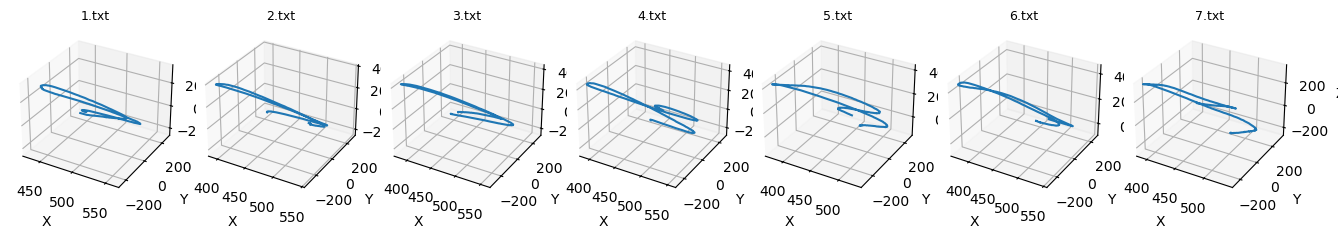


Displaying trajectories for folder: horizontal


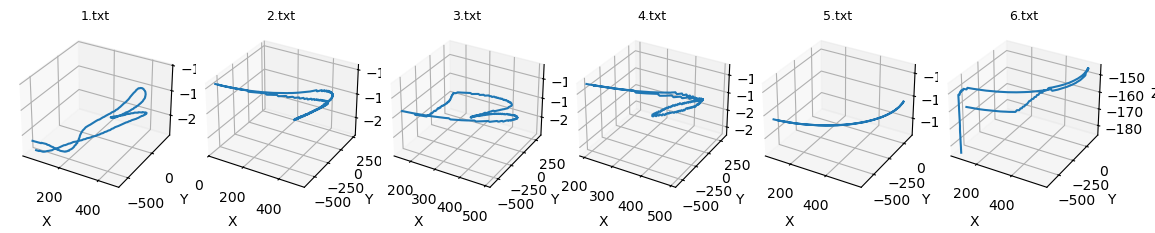


Displaying trajectories for folder: vertical


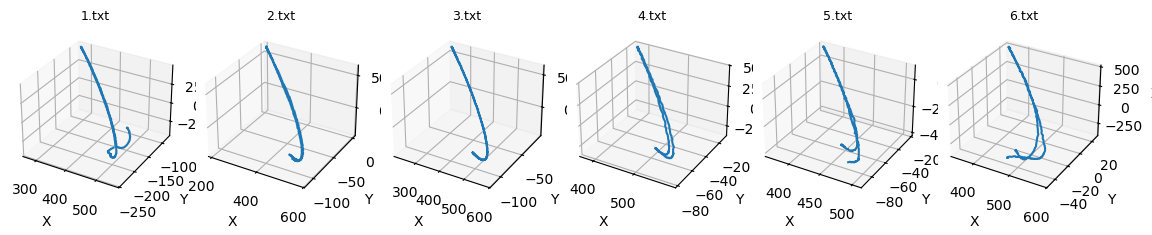

In [22]:
for folder_name in target_folders:
    class_path = os.path.join(folder_path, folder_name)
    
    if not os.path.isdir(class_path):
        print(f"Folder '{folder_name}' does not exist in {folder_path}")
        continue

    file_list = glob.glob(os.path.join(class_path, "*.txt"))
    if not file_list:
        print(f"No files found in '{folder_name}'")
        continue

    print(f"\nDisplaying trajectories for folder : {folder_name}")

    n_files = len(file_list)
    n_cols = 8
    n_rows = int(np.ceil(n_files / n_cols))
    fig = plt.figure(figsize=(15, 3 * n_rows))

    for i, file_path in enumerate(file_list, start=1):
        df = pd.read_csv(file_path, sep=",", comment="#")
        points = df.iloc[:, 6]
        df[["x", "y", "z"]] = points.str.split("/", expand=True).astype(float)
        df = df.dropna(subset=["x", "y", "z"])

        ax = fig.add_subplot(n_rows, n_cols, i, projection='3d')
        ax.plot(df["x"], df["y"], df["z"])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(os.path.basename(file_path), fontsize=9)

    plt.tight_layout()
    plt.show()